Link : `https://www.kaggle.com/`

# Import

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get Dataset

In [3]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data preprocessing

In [11]:
insurance_encoded = pd.get_dummies(insurance)
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
X = insurance_encoded.drop(['charges'], axis=1, inplace=False).values
y = insurance_encoded['charges'].values

In [38]:
test_size_percentage = 20
train_size = np.int(np.round( (y.shape[0]*(100-test_size_percentage)) / 100))
train_size

1070

In [40]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], X[train_size:]

# Creating model

In [44]:
inputShape = X.shape[1]
inputShape

11

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(inputShape),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

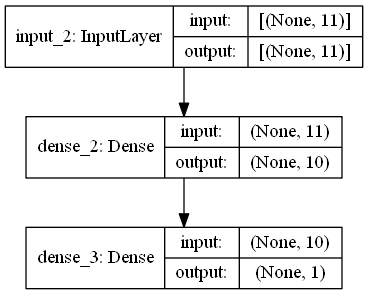

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [59]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 2s 2ms/step - loss: 8341.1328 - mae: 8341.1328
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 7612.7324 - mae: 7612.7324
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 7621.0396 - mae: 7621.0396
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 7287.6768 - mae: 7287.6768
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 7682.1855 - mae: 7682.1855
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 7527.7686 - mae: 7527.7686
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 7606.2852 - mae: 7606.2852
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: 7611.4712 - mae: 7611.4712
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 7404.3213 - mae: 7404.3213
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 7509.3813 - mae: 7509.3813
